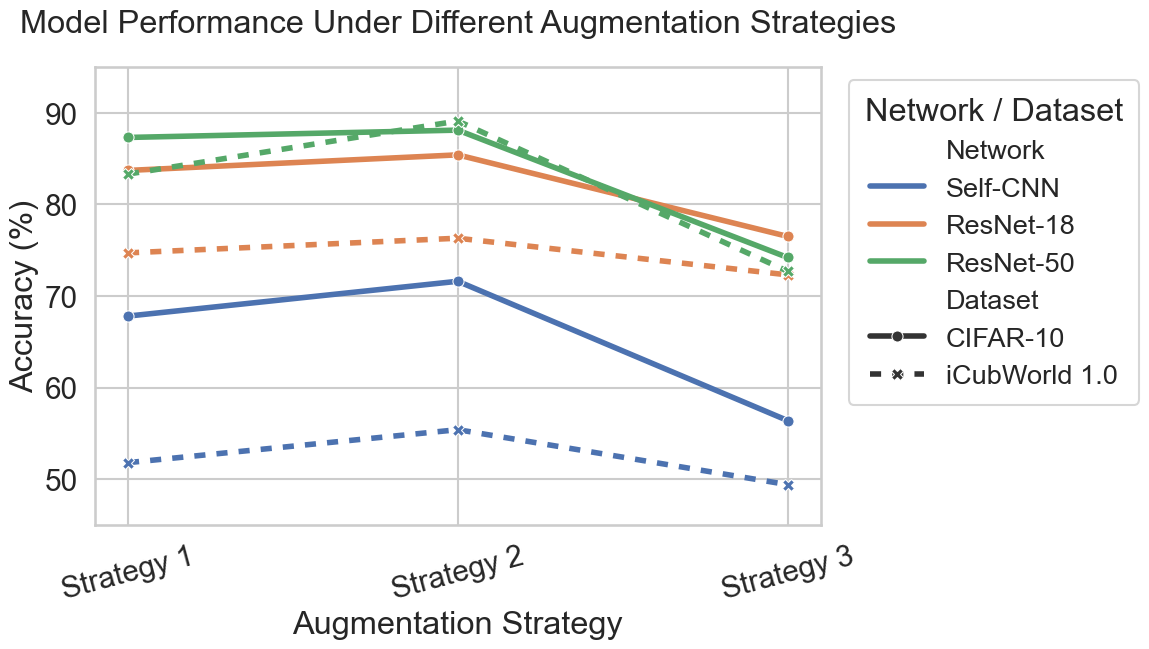

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

# —— 1. 准备数据 —— #
df = pd.read_csv('cnn_da.csv')
# df = pd.read_csv(io.StringIO(csv_text))

df = df.rename(columns={
    'No Augmentation': 'Strategy 1',
    'Rotation and Cropping': 'Strategy 2',
    'ColorJitter and RandomPerspective': 'Strategy 3'
})

# —— 2. 转成长表 —— #
df_long = df.melt(
    id_vars=['Network','Dataset'],
    var_name='Strategy',
    value_name='Accuracy'
)

# —— 3. 画布 & 风格 —— #
sns.set_theme(style='whitegrid', context='talk', font_scale=1.3)
plt.figure(figsize=(12, 7))

# —— 4. 折线图 —— #
ax = sns.lineplot(
    data=df_long,
    x='Strategy',
    y='Accuracy',
    hue='Network',
    style='Dataset',
    markers=True,
    dashes={ 'CIFAR-10': '', 'iCubWorld 1.0': (2,2) },
    markersize=8,
    linewidth=4
)

# —— 5. 标题 & 坐标 —— #
ax.set_title(
    'Model Performance Under Different Augmentation Strategies',
    pad=25, loc='center'
)
ax.set_xlabel('Augmentation Strategy')
ax.set_ylabel('Accuracy (%)')
ax.set_ylim(45, 95)
plt.xticks(rotation=15)

# —— 6. 缩小绘图区给图例留位置 —— #
plt.subplots_adjust(right=0.75)

# —— 7. 图例放到右侧空白区 —— #
ax.legend(
    title='Network / Dataset',
    loc='upper left',
    bbox_to_anchor=(1.02, 1),  # 完全跑到绘图区右侧
    fontsize='small',
    title_fontsize='medium',
    borderpad=0.6,
    frameon=True
)

plt.tight_layout()
plt.show()